<a href="https://colab.research.google.com/github/khayes39/firstrepo/blob/main/Hw5_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
import torch.optim as opt
from matplotlib import pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


drive.mount('/content/drive')

file_path = '/content/drive/My Drive/ML/Data_sets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))


def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

bin_varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[bin_varlist] = housing[bin_varlist].apply(binary_map)


xvarlist =  ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

x_vals = housing[xvarlist]
y_vals = housing['price']
x_vals.head()

#standardization
scaler = StandardScaler()
x_vals = scaler.fit_transform(x_vals)

#convert to tensor
x_vals = torch.tensor(x_vals)
y_vals = torch.tensor(y_vals)


#splitting into test and train
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, train_size = 0.8, test_size = 0.2, random_state = 100)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#defining linear model and loss function and training loop

# weights = ['w1', 'w2', 'w3', 'w4', 'w5']
def model(X, w0, w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11) :
    return w0 + X[:,0]*w1 + X[:,1]*w2 + X[:,2]*w3 + X[:,3]*w4 + X[:,4]*w5 + X[:,5]*w6 + X[:,6]*w7 + X[:,7]*w8 + X[:,8]*w9 + X[:,9]*w10 + X[:,10]*w11



def loss_fn(y_p, y) :
    squared_diff = (y_p - y)**2
    return squared_diff.mean()



def training_loop(n_epochs, opt, params, x_train, y_train, x_test, y_test):

    train_loss = []
    val_loss = []

    for epoch in range(0, n_epochs+1):
        #finding the current training loss
        train_pred = model(x_train, *params)
        curr_train_loss = loss_fn(train_pred, y_train)
        train_loss.append(curr_train_loss.item())

        val_pred = model(x_test, *params)
        val_loss.append(loss_fn(val_pred, y_test).item())

        opt.zero_grad()
        curr_train_loss.backward()
        opt.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}: Training loss {train_loss[epoch]:.4f}, Validation loss {val_loss[epoch]:.4f}")

    return train_loss, val_loss








Current optimizer: SGD

Now testing SGD at learning rate: 0.1
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 1000: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 1500: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 2000: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 2500: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 3000: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 3500: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 4000: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 4500: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
Epoch 5000: Training loss 1148468648800.2898, Validation loss 1155909357141.7620
5001


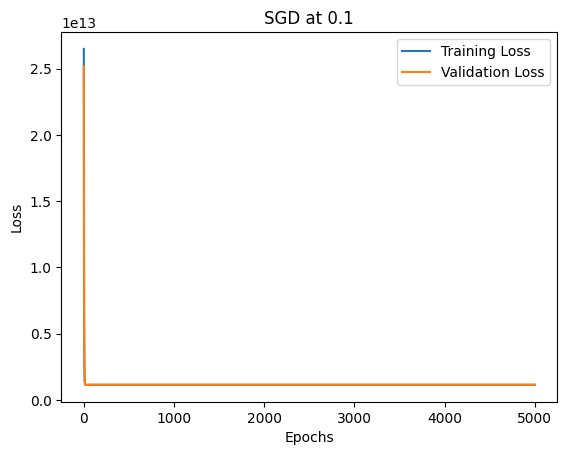


Now testing SGD at learning rate: 0.01
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 1148472494153.4082, Validation loss 1155289388245.6694
Epoch 1000: Training loss 1148468649838.8210, Validation loss 1155897927835.7502
Epoch 1500: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 2000: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 2500: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 3000: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 3500: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 4000: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 4500: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
Epoch 5000: Training loss 1148468648960.8423, Validation loss 1155905716258.8892
5001


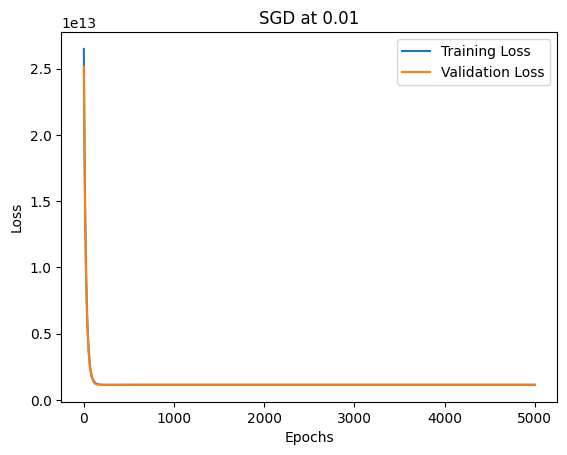


Now testing SGD at learning rate: 0.001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 4280754894429.6738, Validation loss 4027309622845.2554
Epoch 1000: Training loss 1578022632314.4080, Validation loss 1483480560750.2002
Epoch 1500: Training loss 1209984224840.7593, Validation loss 1168585128120.1882
Epoch 2000: Training loss 1157880781515.8135, Validation loss 1141766649890.8320
Epoch 2500: Training loss 1150095240416.6660, Validation loss 1145987368320.8384
Epoch 3000: Training loss 1148809686626.0186, Validation loss 1150362105095.4255
Epoch 3500: Training loss 1148558431257.7131, Validation loss 1152843267013.6084
Epoch 4000: Training loss 1148497273942.4834, Validation loss 1154159326635.2996
Epoch 4500: Training loss 1148478982820.5605, Validation loss 1154871259980.8484
Epoch 5000: Training loss 1148472657982.9966, Validation loss 1155272131626.7690
5001


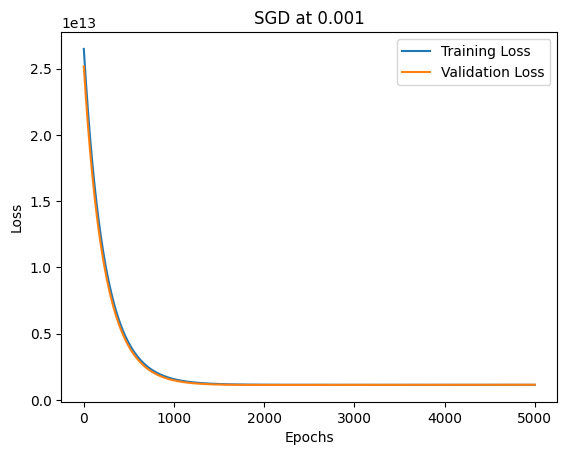


Now testing SGD at learning rate: 0.0001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 21453236789830.5781, Validation loss 20349043105198.9570
Epoch 1000: Training loss 17495341991167.1895, Validation loss 16574618124581.8457
Epoch 1500: Training loss 14355007408843.9629, Validation loss 13587496256672.8164
Epoch 2000: Training loss 11848349298342.3691, Validation loss 11206853831457.9688
Epoch 2500: Training loss 9837544127455.8809, Validation loss 9298700560948.1016
Epoch 3000: Training loss 8217943622348.7920, Validation loss 7762261973453.1104
Epoch 3500: Training loss 6909105473891.5059, Validation loss 6520652978683.0967
Epoch 4000: Training loss 5848536301520.7900, Validation loss 5514471820083.7178
Epoch 4500: Training loss 4987262634347.4717, Validation loss 4697340374797.8633
Epoch 5000: Training loss 4286574701050.6387, Validation loss 4032675873939.7920
5001


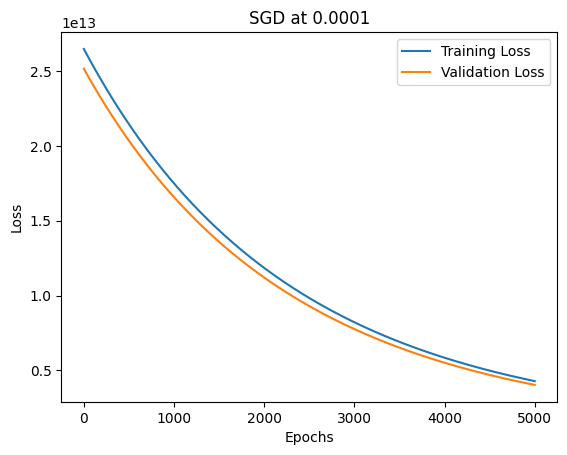



Current optimizer: Adam

Now testing Adam at learning rate: 0.1
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26476389003861.7148, Validation loss 25157588720391.4766
Epoch 1000: Training loss 26475187969425.5078, Validation loss 25156422506447.1602
Epoch 1500: Training loss 26473987075173.6133, Validation loss 25155256459092.6406
Epoch 2000: Training loss 26472786387663.6055, Validation loss 25154090617639.8594
Epoch 2500: Training loss 26471585878884.9258, Validation loss 25152924965289.0508
Epoch 3000: Training loss 26470385437791.9766, Validation loss 25151759398665.3047
Epoch 3500: Training loss 26469185120091.6289, Validation loss 25150593980668.1484
Epoch 4000: Training loss 26467984924847.1289, Validation loss 25149428696379.0430
Epoch 4500: Training loss 26466784852058.4727, Validation loss 25148263545797.9844
Epoch 5000: Training loss 26465584901725.6602, Validation loss 25147098528924.9766
5001


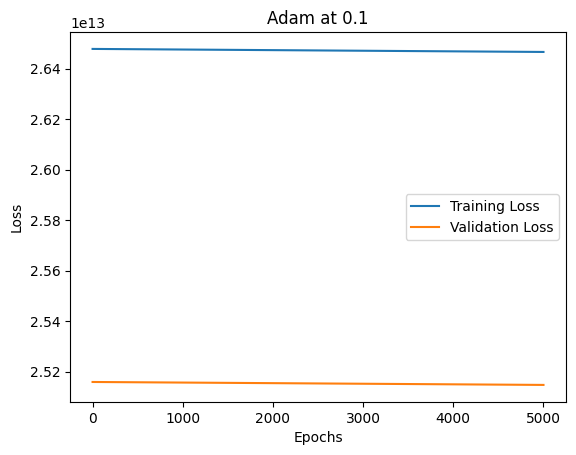


Now testing Adam at learning rate: 0.01
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26477470083681.5078, Validation loss 25158638477564.2734
Epoch 1000: Training loss 26477349955830.3945, Validation loss 25158521829222.1250
Epoch 1500: Training loss 26477229827420.6680, Validation loss 25158405181719.4844
Epoch 2000: Training loss 26477109699484.9570, Validation loss 25158288534128.2188
Epoch 2500: Training loss 26476989572308.9688, Validation loss 25158171886888.4805
Epoch 3000: Training loss 26476869446358.3477, Validation loss 25158055240986.7383
Epoch 3500: Training loss 26476749337207.9531, Validation loss 25157938611544.3984
Epoch 4000: Training loss 26476629236619.0469, Validation loss 25157821990565.7812
Epoch 4500: Training loss 26476509137255.0352, Validation loss 25157705370924.6328
Epoch 5000: Training loss 26476389039115.9414, Validation loss 25157588752620.9727
5001


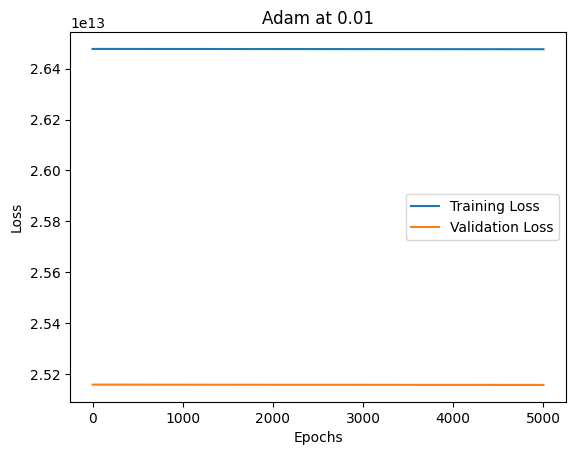


Now testing Adam at learning rate: 0.001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26477578199795.5703, Validation loss 25158743462212.1641
Epoch 1000: Training loss 26477566186688.3672, Validation loss 25158731797045.7734
Epoch 1500: Training loss 26477554173735.2734, Validation loss 25158720132029.4648
Epoch 2000: Training loss 26477542161000.0469, Validation loss 25158708467326.1758
Epoch 2500: Training loss 26477530148931.8203, Validation loss 25158696803172.7891
Epoch 3000: Training loss 26477518136875.8477, Validation loss 25158685139032.7734
Epoch 3500: Training loss 26477506124832.1328, Validation loss 25158673474906.1406
Epoch 4000: Training loss 26477494112800.6641, Validation loss 25158661810792.8867
Epoch 4500: Training loss 26477482100778.0078, Validation loss 25158650146689.6602
Epoch 5000: Training loss 26477470088771.0430, Validation loss 25158638482603.1602
5001


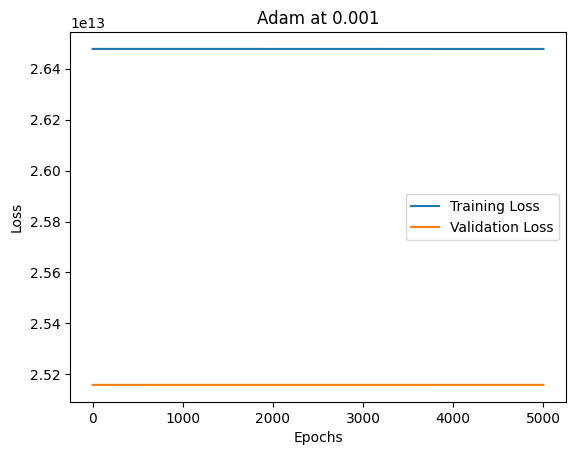


Now testing Adam at learning rate: 0.0001
Epoch 0: Training loss 26477590212965.9531, Validation loss 25158755127441.3672
Epoch 500: Training loss 26477589011586.8984, Validation loss 25158753960857.5156
Epoch 1000: Training loss 26477587810200.2109, Validation loss 25158752794265.6133
Epoch 1500: Training loss 26477586608809.4102, Validation loss 25158751627671.0898
Epoch 2000: Training loss 26477585407418.6328, Validation loss 25158750461076.6055
Epoch 2500: Training loss 26477584206028.1016, Validation loss 25158749294482.4219
Epoch 3000: Training loss 26477583004745.1133, Validation loss 25158748127992.7266
Epoch 3500: Training loss 26477581803462.2539, Validation loss 25158746961503.1641
Epoch 4000: Training loss 26477580602179.5195, Validation loss 25158745795013.7344
Epoch 4500: Training loss 26477579400896.8984, Validation loss 25158744628524.4414
Epoch 5000: Training loss 26477578199614.4102, Validation loss 25158743462035.2734
5001


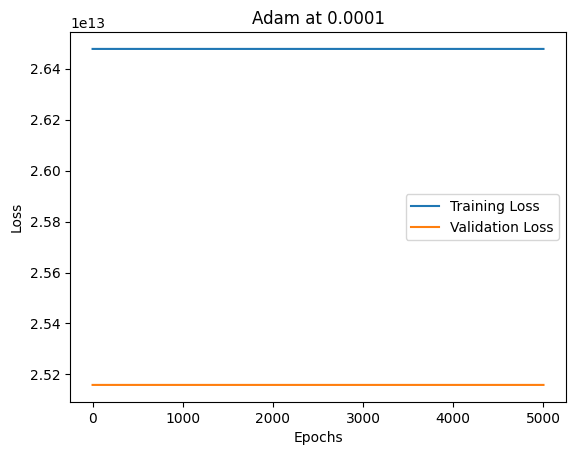

In [8]:
#initialize learning rates and optimizers
learning_rates = [0.1, 0.01, 0.001, 0.0001]
opts = ['SGD','Adam']


for curr_opt in opts:
  print("\n\nCurrent optimizer: "+curr_opt)
  for lr in learning_rates:

      #initializing parameters
      parameters = torch.tensor([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], requires_grad=True)

      #setting up the current optimizer with the current learning rate
      if curr_opt == 'SGD':
        optim = opt.SGD([parameters], lr=lr)
        print("\nNow testing SGD at learning rate:",lr)
      elif curr_opt == 'Adam':
        optim = opt.Adam([parameters], lr=lr)
        print("\nNow testing Adam at learning rate:",lr)
      else:
        print("What?")

      #running the training loop
      curr_train_loss, curr_val_loss = training_loop(n_epochs = 5000, opt = optim, params = parameters, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)


      print(len(curr_train_loss))
      plt.figure()
      plt.plot(range(0, len(curr_train_loss)), curr_train_loss, label="Training Loss")
      plt.plot(range(0, len(curr_val_loss)), curr_val_loss, label="Validation Loss")
      plt.title(f"{curr_opt} at {lr}")
      plt.xlabel("Epochs")
      plt.ylabel("Loss")
      plt.legend()
      plt.show()









